# Stock Price Prediction (Infosys Stock)

Here, I am collecting live stock price data and creating a model to predict the closing price for next 1day at a time. 
We are predicting for very just 1 day because stock market is highly volatile and predictions are more accurate when we predict for less number of days.

## Getting the stock data for Infosys Stock

In [1]:
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

In [2]:
# install the nsepy library to get stock prices
#!pip install nsepy

In [56]:
# Getting Stock data using nsepy library
from nsepy import get_history
from datetime import datetime

startDate=datetime(2019, 1,1)
endDate=datetime(2021, 8, 26)

# Fetching the data
StockData=get_history(symbol='INFY', start=startDate, end=endDate)
print(StockData.shape)
StockData.head()

(658, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-01-01,INFY,EQ,658.95,660.95,666.3,654.15,665.95,665.05,660.66,2943390,1.944579e+14,45422,1282161,0.4356
2019-01-02,INFY,EQ,665.05,666.00,674.0,662.05,668.00,669.05,669.97,7416655,4.968963e+14,108094,3880800,0.5233
2019-01-03,INFY,EQ,669.05,672.00,677.0,663.10,668.00,669.15,669.66,6827249,4.571929e+14,125781,3676359,0.5385
2019-01-04,INFY,EQ,669.15,671.75,673.9,651.00,660.25,661.05,660.17,7889310,5.208305e+14,187590,3747741,0.4750
2019-01-07,INFY,EQ,661.05,665.00,673.6,661.50,671.70,671.70,667.51,8046340,5.370974e+14,132736,4711672,0.5856


In [57]:
# Creating a column as date
StockData['TradeDate']=StockData.index
StockData.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,TradeDate
Date,,,,,,,,,,,,,,,
2021-08-20,INFY,EQ,1733.45,1716.10,1745.00,1716.1,1729.50,1732.95,1734.19,6206972,1.076408e+15,188065,3883003,0.6256,2021-08-20
2021-08-23,INFY,EQ,1732.95,1735.75,1753.15,1732.0,1739.60,1738.75,1741.65,6189051,1.077919e+15,170252,3872899,0.6258,2021-08-23
2021-08-24,INFY,EQ,1738.75,1750.00,1757.00,1712.7,1721.50,1720.85,1729.85,7602939,1.315198e+15,242564,5474553,0.7201,2021-08-24
2021-08-25,INFY,EQ,1720.85,1718.00,1746.90,1718.0,1737.65,1735.55,1732.13,6153253,1.065823e+15,140494,4174523,0.6784,2021-08-25
2021-08-26,INFY,EQ,1735.55,1734.00,1746.00,1720.0,1723.40,1727.70,1734.31,5302248,9.195717e+14,114055,3452873,0.6512,2021-08-26


### Plotting the closing  prices of stock

<AxesSubplot:xlabel='TradeDate'>

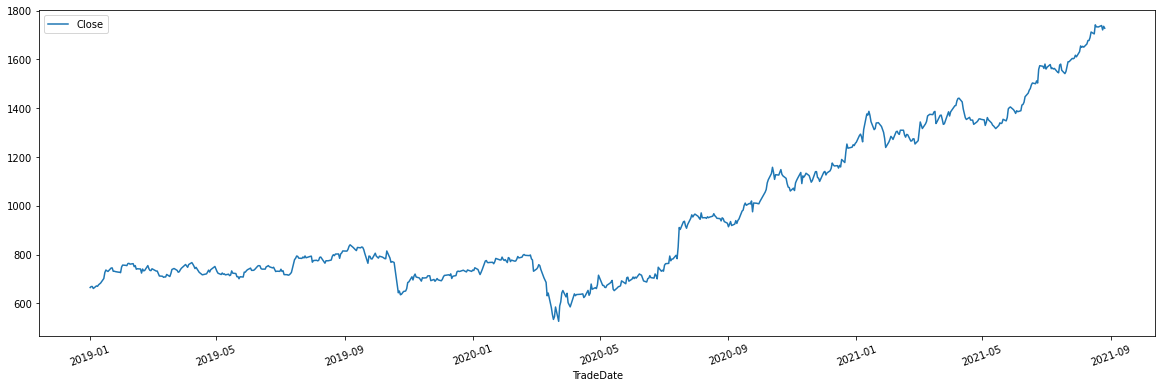

In [58]:
%matplotlib inline
StockData.plot(x='TradeDate', y='Close', kind='line', figsize=(20,6), rot=20)

### Preparing the data

In [59]:
FullData=StockData[['Close']].values
FullData[-20:]

array([[1617.  ],
       [1610.5 ],
       [1631.55],
       [1655.2 ],
       [1649.25],
       [1653.55],
       [1650.2 ],
       [1663.3 ],
       [1677.25],
       [1677.55],
       [1689.6 ],
       [1712.2 ],
       [1704.4 ],
       [1741.65],
       [1733.45],
       [1732.95],
       [1738.75],
       [1720.85],
       [1735.55],
       [1727.7 ]])

### Feature Scaling for fast training

In [60]:
# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()

DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData

X[0:5]

array([[0.1140553 ],
       [0.11734694],
       [0.11742923],
       [0.11076366],
       [0.11952765]])

In [61]:
# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next day's Price Prediction is based on last how many past day's prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

In [62]:
# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
X_data.shape

(648, 10, 1)

In [63]:
X_data[0:2]

array([[[0.1140553 ],
        [0.11734694],
        [0.11742923],
        [0.11076366],
        [0.11952765],
        [0.11816985],
        [0.12314845],
        [0.12611093],
        [0.12923799],
        [0.14437953]],

       [[0.11734694],
        [0.11742923],
        [0.11076366],
        [0.11952765],
        [0.11816985],
        [0.12314845],
        [0.12611093],
        [0.12923799],
        [0.14437953],
        [0.1647054 ]]])

In [64]:
# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
y_data=y_data.reshape(y_data.shape[0], 1)
y_data.shape

(648, 1)

In [12]:
# Choosing the number of testing data records
TestingRecords=5

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

In [13]:
# Printing the shape of training and testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(639, 10, 1)
(639, 1)
(5, 10, 1)
(5, 1)


In [14]:
# Visualizing the input and output being sent to the LSTM model
for inp, out in zip(X_train[0:5], y_train[0:5]):
    print(inp,'-->', out)

[[0.1140553 ]
 [0.11734694]
 [0.11742923]
 [0.11076366]
 [0.11952765]
 [0.11816985]
 [0.12314845]
 [0.12611093]
 [0.12923799]
 [0.14437953]] --> [0.1647054]
[[0.11734694]
 [0.11742923]
 [0.11076366]
 [0.11952765]
 [0.11816985]
 [0.12314845]
 [0.12611093]
 [0.12923799]
 [0.14437953]
 [0.1647054 ]] --> [0.17309908]
[[0.11742923]
 [0.11076366]
 [0.11952765]
 [0.11816985]
 [0.12314845]
 [0.12611093]
 [0.12923799]
 [0.14437953]
 [0.1647054 ]
 [0.17309908]] --> [0.17026004]
[[0.11076366]
 [0.11952765]
 [0.11816985]
 [0.12314845]
 [0.12611093]
 [0.12923799]
 [0.14437953]
 [0.1647054 ]
 [0.17309908]
 [0.17026004]] --> [0.16828506]
[[0.11952765]
 [0.11816985]
 [0.12314845]
 [0.12611093]
 [0.12923799]
 [0.14437953]
 [0.1647054 ]
 [0.17309908]
 [0.17026004]
 [0.16828506]] --> [0.17984694]


In [15]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


## Fitting the Deep Learning LSTM model

In [16]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))


# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Using TensorFlow backend.


In [17]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
639/639 [==============================] - 5s 8ms/step - loss: 0.0695
Epoch 2/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 3/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0011
Epoch 4/100
639/639 [==============================] - 2s 3ms/step - loss: 9.8461e-04
Epoch 5/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0010
Epoch 6/100
639/639 [==============================] - 2s 3ms/step - loss: 9.8979e-04
Epoch 7/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0010
Epoch 8/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0011
Epoch 9/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0010
Epoch 10/100
639/639 [==============================] - 2s 3ms/step - loss: 9.6022e-04
Epoch 11/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0010
Epoch 12/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0010
E

## Generating predictions on testing data

In [18]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

array([[1704.5612],
       [1715.6227],
       [1721.4534],
       [1731.7025],
       [1739.7501]], dtype=float32)

In [19]:
# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
orig

array([[1712.2 ],
       [1704.4 ],
       [1741.65],
       [1733.45],
       [1732.95]])

## Measuring the Accuracy of predictions

In [20]:
# Accuracy of the predictions
100 - (100*(abs(orig-predicted_Price)/orig)).mean()

99.44851342387744

## Plotting the predictions for Testing data


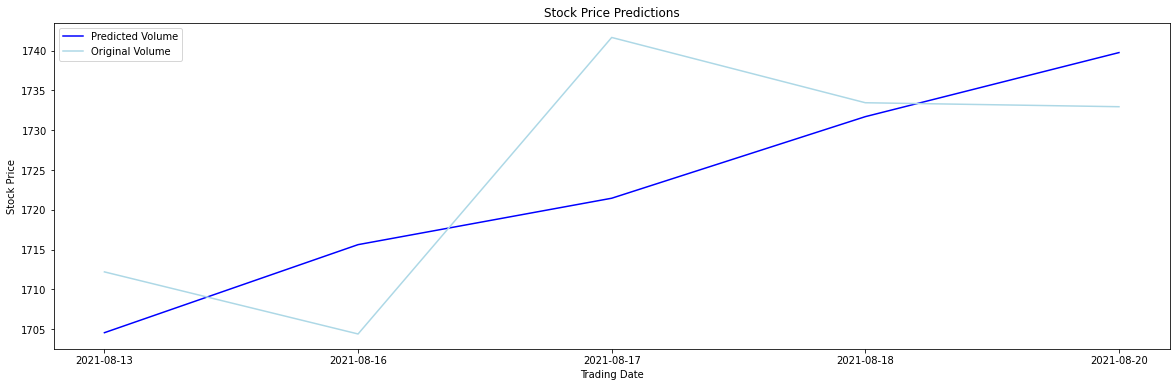

In [21]:
# Visualising the results
import matplotlib.pyplot as plt

plt.plot(predicted_Price, color = 'blue', label = 'Predicted Volume')
plt.plot(orig, color = 'lightblue', label = 'Original Volume')

plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(range(TestingRecords), StockData.tail(TestingRecords)['TradeDate'])
plt.ylabel('Stock Price')

plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

## Training the model using full data 

In [65]:
# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))


# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_data, y_data, batch_size = 5, epochs = 100)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
648/648 [==============================] - 3s 4ms/step - loss: 0.0904
Epoch 2/100
648/648 [==============================] - 2s 3ms/step - loss: 0.0039
Epoch 3/100
648/648 [==============================] - 2s 2ms/step - loss: 0.0029
Epoch 4/100
648/648 [==============================] - 2s 2ms/step - loss: 0.0022
Epoch 5/100
648/648 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 6/100
648/648 [==============================] - 2s 3ms/step - loss: 0.0013
Epoch 7/100
648/648 [==============================] - 2s 2ms/step - loss: 0.0012
Epoch 8/100
648/648 [==============================] - 2s 2ms/step - loss: 0.0012
Epoch 9/100
648/648 [==============================] - 2s 3ms/step - loss: 0.0011
Epoch 10/100
648/648 [==============================] - 2s 2ms/step - loss: 0.0011
Epoch 11/100
648/648 [==============================] - 2s 3ms/step - loss: 0.0012
Epoch 12/100
648/648 [==============================] - 2s 3ms/step - loss: 0.0011
Epoch 13/100


## Generating predictions for next day

In [66]:
# Making predictions on test data
predicted_Price = regressor.predict(X_data[-1:])
predicted_Price = DataScaler.inverse_transform(predicted_Price)
predicted_Price

array([[1766.5282]], dtype=float32)

## Accuracy check 

                 Original Price     Predicted Price
23/8/2021(Monday)------>1738.75-------------------->1714.5729

24/8/2021(Tuesday)----->1720.85-------------------->1696.1956

25/8/2021(Wednesday)->1735.55-------------------->1748.4498

26/8/2021(Thursday)---->1727.70-------------------->1699.4266

27/8/2021(Saturday)---->1708.80-------------------->1766.5282

I have noted the original closing price on daily to check the accuracy.

<b> Accuracy of the predictions - 98.284% <b>


## Conclusion
Here we have predicted for one day at a time. We have predicted for one day at a time because share market is highly volatile and predicting for a single day gives very good accuracy. This type of predictions can be used for day trading. In the next notebook we will predict for 5 days at a time and check whether there is any change in accuracy.

I have ran this codes every night to predict next day's closing price. After that I noted the original closing price at the end of the day to check the accuracy of the prediction.